### Computação Quântica com Qiskit <br> Autor: Jonas Maziero

In [1]:
from qiskit import * # import tudo do qiskit

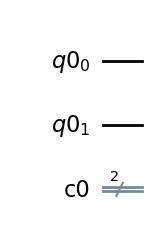

In [2]:
# Determina o número de qubits e de cbits a serem utilizados
qr = QuantumRegister(2) # determina quantos qubits serão usados
cr = ClassicalRegister(2) # determina quantos cbits serão usados

# Constrói o circuito quântico
qc = QuantumCircuit(qr, cr)

# para poder usar o "output='mpl'", instale pylatexenc usando o comando
# pip install pylatexenc
qc.draw(output='mpl') # mostra o circuito

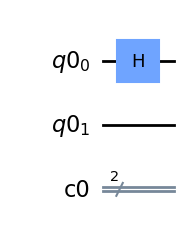

In [3]:
# adiciona a porta lógica de Hadamard ao circuito, aplicada no qubit (registro quântico) 0
qc.h(qr[0]); 
qc.draw(output='mpl')

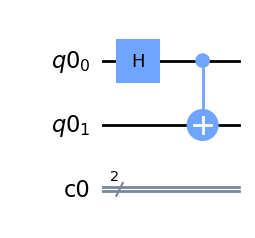

In [4]:
# adiciona uma controll-not ao circuito, com o controle sendo qr[0] e o target sendo qr[1]
qc.cx(qr[0],qr[1])
# é importante sempre mandar mostrar o circuito, pra ter certeza que é realmente o que queremos construir
qc.draw(output='mpl')

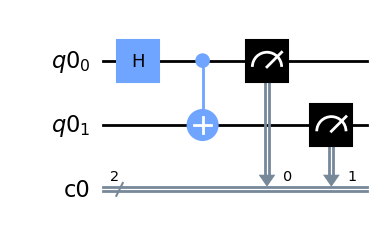

In [5]:
# adiciona medidas em todos os qubits (a ser usada quando queremos acessar a distribuições de probabilidades)
qc.measure(qr,cr);
# Você poderia adicionar medidas em cada qubit, individualmente, e.g.,
# qc.measure(qr[0],cr[0])

qc.draw(output='mpl')

### Executando no simulador

In [6]:
# Determina o backend a ser usado, que poder ser um simulador ou um chip real
# Neste caso escolhemos o simulador qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

In [7]:
# número de medidas para estimativa de uma distribuição de probabilidades
nshots = 8192

In [8]:
# executa o circuito qc no backend escolhido
job = execute(qc, backend = simulator, shots = nshots)

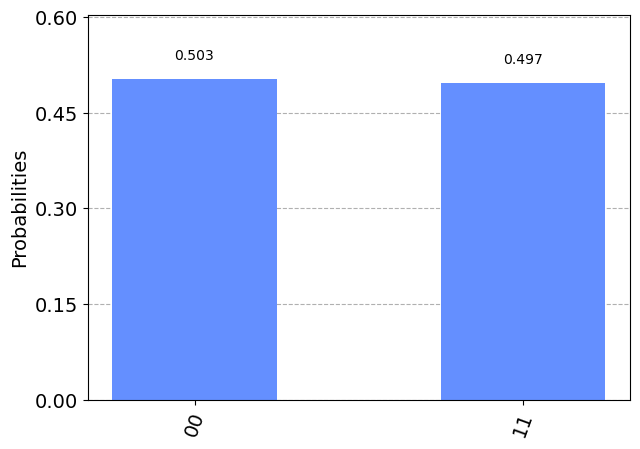

In [9]:
# para visualizar o histograma da distribuicao de probabilidades
from qiskit.tools.visualization import plot_histogram
plot_histogram(job.result().get_counts(qc))

In [10]:
# Sobre a função get_counts
counts = job.result().get_counts(qc)
counts, counts['00']

({'00': 4121, '11': 4071}, 4121)

### Executando no chip

In [11]:
import qiskit

In [17]:
# carrega minha conta no IBMQ (o ID foi incluido no outro arquivo, nao precisa incluir aqui)
qiskit.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
#provider = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider(hub = 'ibm-q', group = 'open', project = 'main')

In [19]:
# determina em qual backend vamos executar o circuito
device = provider.get_backend('ibmq_belem')

In [21]:
from qiskit.tools.monitor import job_monitor

In [22]:
# executa o circuito quantico qc no CQ escolhido
job = execute(qc, backend = device, shots = nshots)

# para monitorar a execucao do circuito
job_monitor(job)

Job Status: job has successfully run


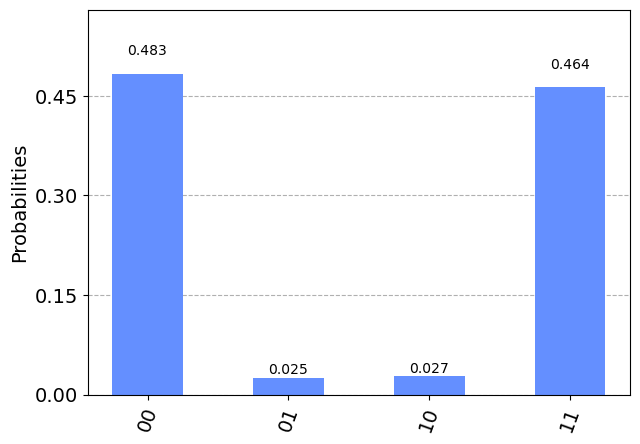

In [24]:
plot_histogram(job.result().get_counts(qc))

## Tomografia de estados

### No simulador


In [13]:
# importa tambem funcoes para determinar os circuitos a serem tomografados e pra ajustar os dados
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

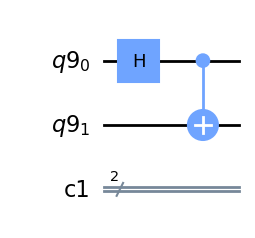

In [14]:
# cria o circuito quantico sem as medidas
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.draw(output='mpl')

In [15]:
# Determina de qual circuito e de qual qubit fazer TEQ
qstc = state_tomography_circuits(qc, [qr[0]])

# OBS. Pra tomografia, não pode ter medidas no circuito quântico

In [16]:
# testa/executa no simulador
job = execute(qstc, simulator, shots=nshots)

In [17]:
# 'ajusta' os resultados conforme o esperado do circuit qst
qstf = StateTomographyFitter(job.result(), qstc)

In [18]:
# extrai o operador densidade tomografado
rho = qstf.fit(method='lstsq')
rho

array([[0.5057373 +0.j        , 0.00549316+0.00305176j],
       [0.00549316-0.00305176j, 0.4942627 +0.j        ]])

In [19]:
from qiskit.visualization import plot_state_city

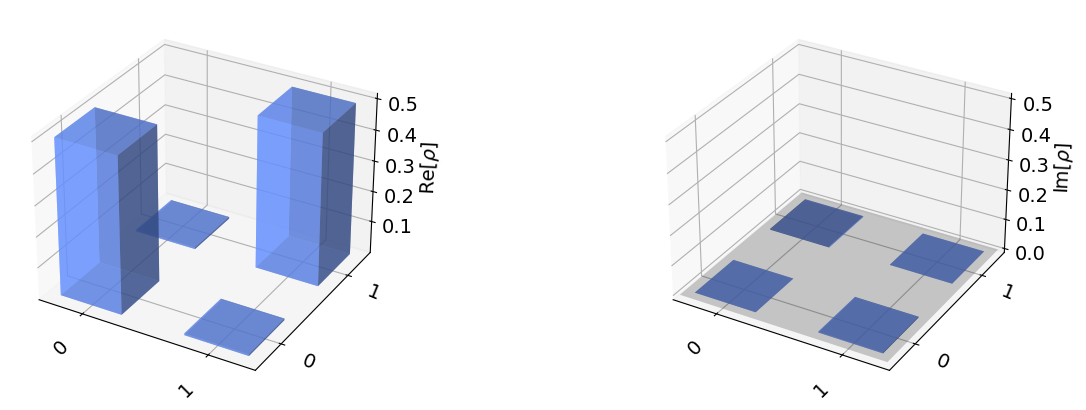

In [20]:
plot_state_city(rho, alpha=0.6)

## No chip

In [48]:
# executa os circuitos para TEQ no chip
job = execute(qstc, backend = device, shots = nshots)
print(job.job_id())
job_monitor(job)

63d33111a9563a2f973be06b
Job Status: job has successfully run


In [49]:
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
rho

array([[0.51794434+0.j        , 0.02648926-0.00939941j],
       [0.02648926+0.00939941j, 0.48205566+0.j        ]])

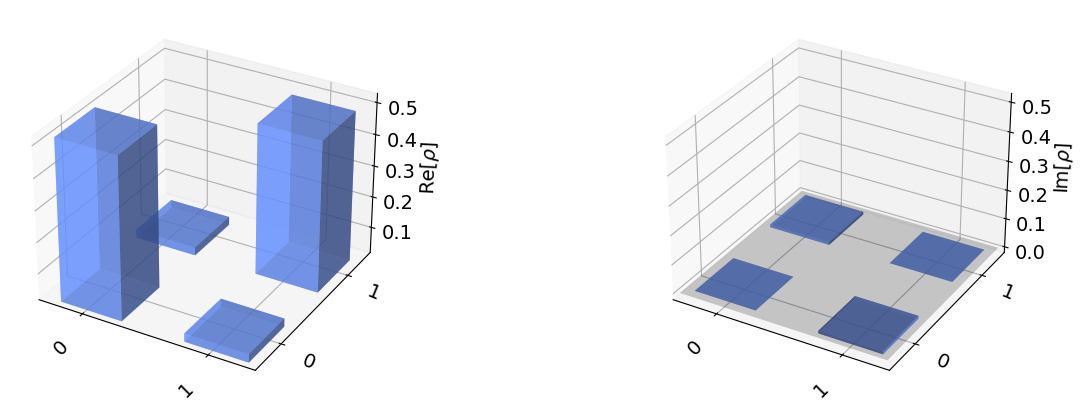

In [50]:
plot_state_city(rho, alpha=0.6)